In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. READ DATASET
The dataset contains nan values so we have to drop them. To check how the data is we print the mean and the standard deviation of each column.
_______________________________________________________________________________________________________________________________

In [ ]:
##READ THE DATABASES AND CHECK VALUES
datapath='/home/silviagr/TFG/'
framingham=pd.read_csv(datapath+'framingham.csv')
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
framingham.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# We are filling the NaN values with the mean for numerical values
data_filled = framingham.fillna(framingham.mode().iloc[0])


In [ ]:
#Change to int the variables that have values of 0 or 1 as they are categorical
columns_to_convert = ['BPMeds']
data_filled['BPMeds'] = data_filled['BPMeds'].astype(int)

In [ ]:
#First we drop education column as it is not relevant for our study - we want to know the clinical variables involved

In [ ]:
data=data_filled.drop(columns='education')
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data.info() #To check that we do not have NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   int64  
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(7), int64(8)
memory usage: 497.0 KB


In [ ]:
data.std()

male                0.495027
age                 8.572942
currentSmoker       0.500024
cigsPerDay         11.904777
BPMeds              0.168513
prevalentStroke     0.076569
prevalentHyp        0.462799
diabetes            0.158280
totChol            44.328954
sysBP              22.033300
diaBP              11.910394
BMI                 4.077826
heartRate          12.023937
glucose            22.919885
TenYearCHD          0.358953
dtype: float64

## FEATURE SELECTION
We will use feature selection methods to know which features choose for our training.

In [ ]:
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.drop(columns='TenYearCHD')
y = data['TenYearCHD']

bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(X,y)
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(X.columns)

featureScores = pd.concat([data_columns,data_scores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(12,'Score'))

              Specs       Score
9             sysBP  727.935535
13          glucose  406.022386
1               age  319.266019
8           totChol  235.859795
3        cigsPerDay  231.669558
10            diaBP  152.748563
6      prevalentHyp   92.048736
7          diabetes   39.144944
4            BPMeds   30.759595
0              male   18.899930
5   prevalentStroke   16.109887
11              BMI   13.593901


# CREATE HISTOGRAMS
After reading the data, we want to chekc all the histograms of all the different variables of the dataset and check their distribution.
There are discrete and continous variables, the discrete ones have values of 0 or 1.
_______________________________________________________________________________________________________________________________

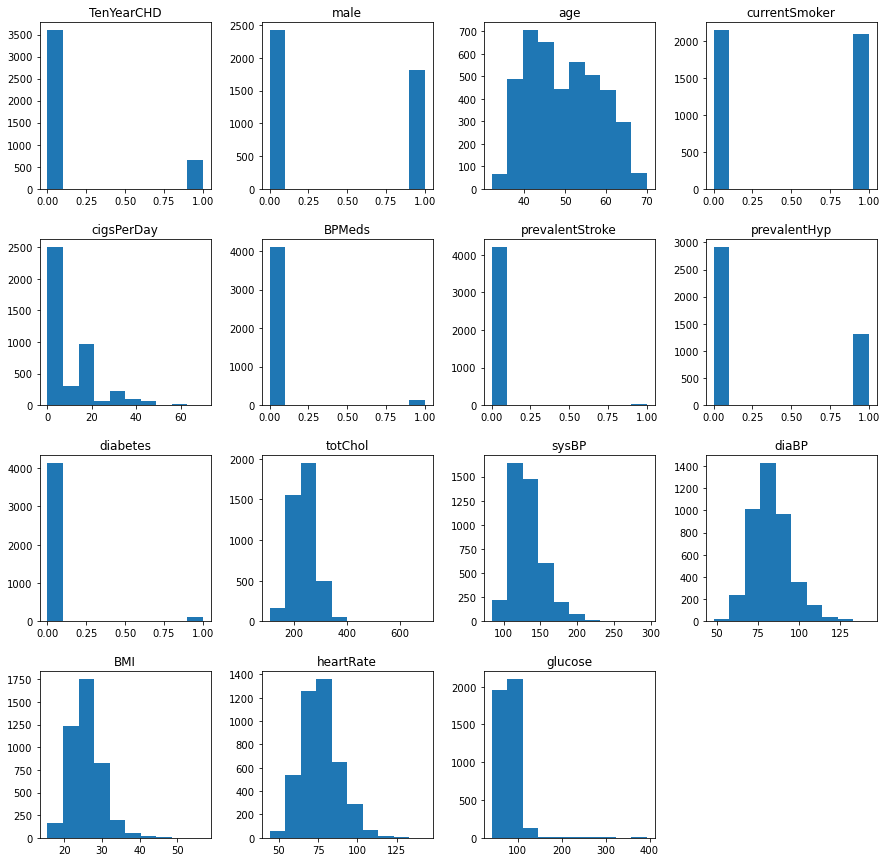

In [ ]:
#SHOW HISTOGRAMS OF ALL THE DATA
bins=10
data.hist(column=['TenYearCHD','male','age','currentSmoker','cigsPerDay',
                 'BPMeds','prevalentStroke','prevalentHyp','diabetes',
                 'totChol','sysBP','diaBP',
                 'BMI','heartRate','glucose'], grid=False, figsize= (15,15),bins=bins)
plt.savefig(datapath+'Histograms.png')


# RELATIONSHIP BETWEEN CHD AND VARIABLES
Now we are using countplots to check the count of CHD cases in each of the variables and try to get the relationship between them both.
________________________________________________________________________________________________________________________________

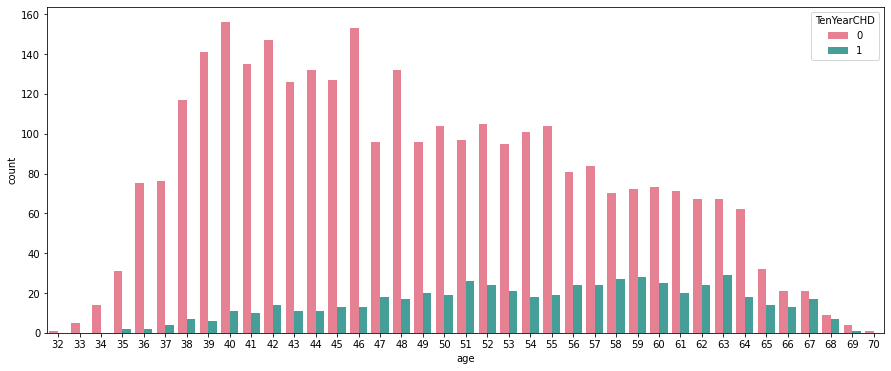

In [ ]:
#PLOT HISTOGRAM OF COLUMNS WITH TENYEARCHD COLUMN
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='age', hue='TenYearCHD',palette='husl')
plt.savefig(datapath+'Age_CHD.png')

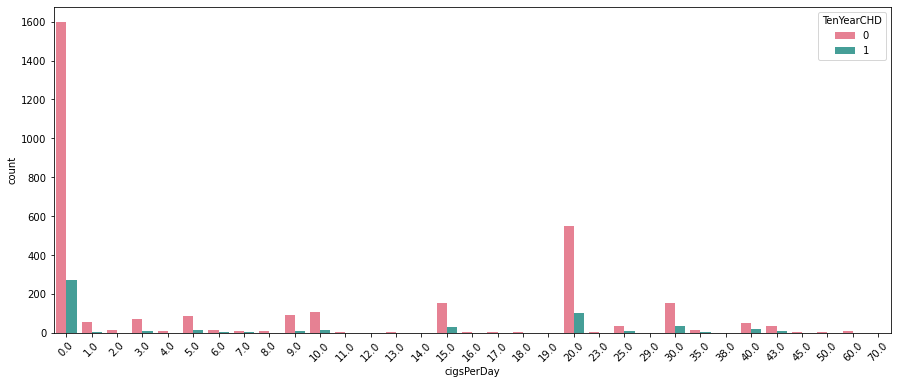

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='cigsPerDay', hue='TenYearCHD',palette='husl')
plt.xticks(rotation=45)
plt.savefig(datapath+'Cigs_CHD.png')

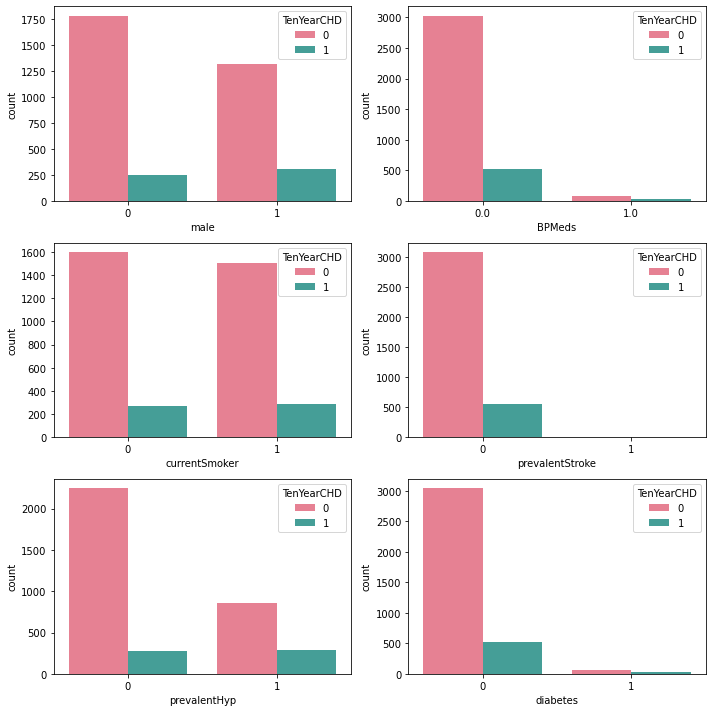

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(3,2)
sns.countplot(data=data, x="male",hue='TenYearCHD', palette='husl',ax=ax[0,0])
sns.countplot(data=data, x='BPMeds', hue='TenYearCHD',palette='husl',ax=ax[0,1])
sns.countplot(data=data, x='currentSmoker', hue='TenYearCHD',palette='husl',ax=ax[1,0])
sns.countplot(data=data, x='prevalentStroke', hue='TenYearCHD',palette='husl',ax=ax[1,1])
sns.countplot(data=data, x='prevalentHyp', hue='TenYearCHD',palette='husl',ax=ax[2,0])
sns.countplot(data=data, x='diabetes', hue='TenYearCHD',palette='husl',ax=ax[2,1])
#ax[-1, -1].axis('off')
plt.savefig(datapath+'DiscreteVar_CHD.png')

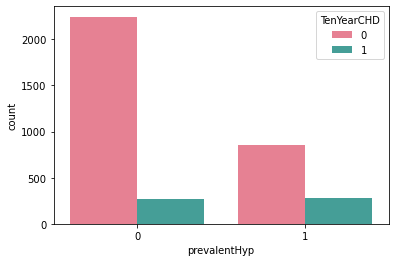

In [ ]:
plt.rcParams["figure.figsize"] = [6, 4]
sns.countplot(data=data, x='prevalentHyp', hue='TenYearCHD',palette='husl')
plt.savefig(datapath+'Hypertension.png')

In [ ]:
grouped_data_H = data.groupby('prevalentHyp')['TenYearCHD'].mean().reset_index()

# Calculate the difference between carrying and not carrying the disease for each range
grouped_data_H['percentage'] = grouped_data_H['TenYearCHD'] * 100

# Display the result
print(grouped_data_H)

   prevalentHyp  TenYearCHD  percentage
0             0    0.108419   10.841938
1             1    0.249123   24.912281


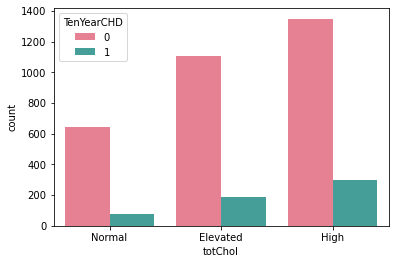

In [ ]:
#Create another dataframe with ranges instead of values for the sake of showing the graphs
##CHOLESTEROL
plt.rcParams["figure.figsize"] = [15, 6]
replacement_dict={range(0, 200): 'Normal', range(200, 240): 'Elevated', range(240, 670): 'High'}
df_chol=data[['totChol','TenYearCHD']].copy()
df_chol['totChol']=df_chol['totChol'].replace(replacement_dict)
sns.countplot(data=df_chol, x='totChol', hue='TenYearCHD',palette='husl', order=['Normal', 'Elevated', 'High'])
plt.savefig(datapath+'Chol_CHD.png')

In [ ]:
df_chol.value_counts()

totChol   TenYearCHD
High      0             1349
Elevated  0             1109
Normal    0              643
High      1              298
Elevated  1              185
Normal    1               74
dtype: int64

In [ ]:
grouped_data = df_chol.groupby('totChol')['TenYearCHD'].mean().reset_index()

# Calculate the difference between carrying and not carrying the disease for each range
#grouped_data['difference'] = grouped_data['TenYearCHD'].subtract(1 - grouped_data['TenYearCHD'])
grouped_data['percentage'] = grouped_data['TenYearCHD'] * 100

# Display the result
print(grouped_data)

    totChol  TenYearCHD  percentage
0  Elevated    0.142968   14.296754
1      High    0.180935   18.093503
2    Normal    0.103208   10.320781


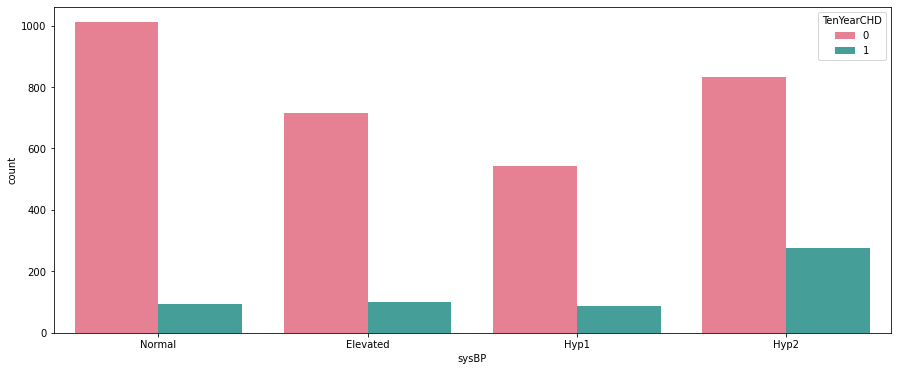

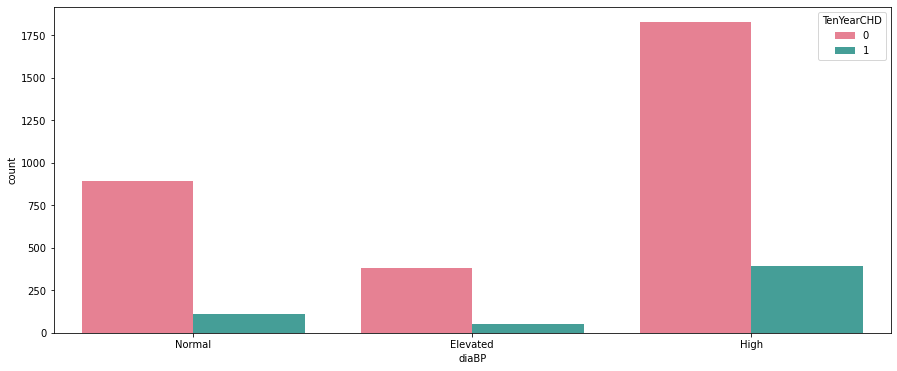

In [ ]:
##SYSBP AND DIABP
plt.rcParams["figure.figsize"] = [15, 6]
df_BP=data[['sysBP','diaBP','TenYearCHD']].copy()
replacement_dictSB={
    tuple(np.arange(0.0, 120.0, 0.1).round(1)): 'Normal',
    tuple(np.arange(120.0, 130.0, 0.1).round(1)): 'Elevated',
    tuple(np.arange(130.0, 140.0, 0.1).round(1)): 'Hyp1',
    tuple(np.arange(140.0, 296.0, 0.1).round(1)): 'Hyp2',
    }
replacement_dictDB={
    tuple(np.arange(0.0, 75.5, 0.1).round(1)): 'Normal',
    tuple(np.arange(75.5, 80.0, 0.1).round(1)): 'Elevated',
    tuple(np.arange(80.0, 143.0, 0.1).round(1)): 'High',
    }
df_BP['sysBP']=df_BP['sysBP'].replace(replacement_dictSB)
df_BP['diaBP']=df_BP['diaBP'].replace(replacement_dictDB)
plt.figure()
sns.countplot(data=df_BP, x='sysBP', hue='TenYearCHD',palette='husl',order=['Normal', 'Elevated', 'Hyp1','Hyp2'])
plt.savefig(datapath+'sysBP_CHD.png')
plt.figure()
sns.countplot(data=df_BP, x='diaBP', hue='TenYearCHD',palette='husl',order=['Normal', 'Elevated', 'High'])
plt.savefig(datapath+'diaBP_CHD.png')

In [ ]:
df_BP['diaBP'].unique()

array(['Normal', 'High', 'Elevated'], dtype=object)

In [ ]:
grouped_data_DBP = df_BP.groupby('diaBP')['TenYearCHD'].mean().reset_index()

# Calculate the difference between carrying and not carrying the disease for each range
#grouped_data['difference'] = grouped_data['TenYearCHD'].subtract(1 - grouped_data['TenYearCHD'])
grouped_data_DBP['percentage'] = grouped_data_DBP['TenYearCHD'] * 100

# Display the result
print(grouped_data_DBP)

      diaBP  TenYearCHD  percentage
0  Elevated    0.121839   12.183908
1      High    0.177398   17.739757
2    Normal    0.109780   10.978044


In [ ]:
grouped_data_SBP = df_BP.groupby('sysBP')['TenYearCHD'].mean().reset_index()

# Calculate the difference between carrying and not carrying the disease for each range
#grouped_data['difference'] = grouped_data['TenYearCHD'].subtract(1 - grouped_data['TenYearCHD'])
grouped_data_SBP['percentage'] = grouped_data_SBP['TenYearCHD'] * 100

# Display the result
print(grouped_data_SBP)

      sysBP  TenYearCHD  percentage
0  Elevated    0.122699   12.269939
1      Hyp1    0.138315   13.831479
2      Hyp2    0.249550   24.954955
3    Normal    0.084239    8.423913


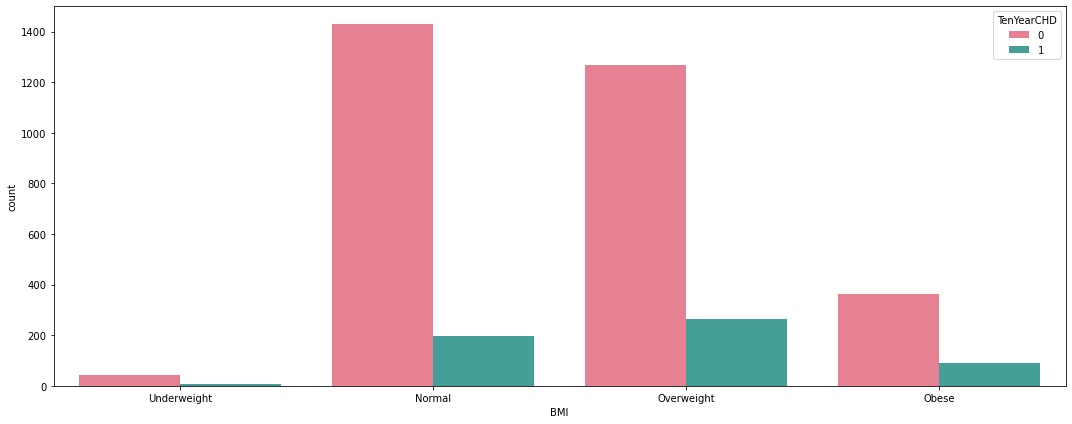

In [ ]:
##BMI
plt.rcParams["figure.figsize"] = [15, 6]
df_BMI=data[['BMI','TenYearCHD']].copy()
replacement_dictBMI = {
    tuple(np.arange(0.00, 18.51, 0.01).round(2)): 'Underweight',
    tuple(np.arange(18.50, 25.01, 0.01).round(2)): 'Normal',
    tuple(np.arange(25.00, 30.01, 0.01).round(2)): 'Overweight',
    tuple(np.arange(30.00, 45.01, 0.01).round(2)): 'Obese'
}
df_BMI['BMI']=df_BMI['BMI'].replace(replacement_dictBMI)
sns.countplot(data=df_BMI, x='BMI', hue='TenYearCHD',palette='husl',order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.savefig(datapath+'BMI_CHD.png')

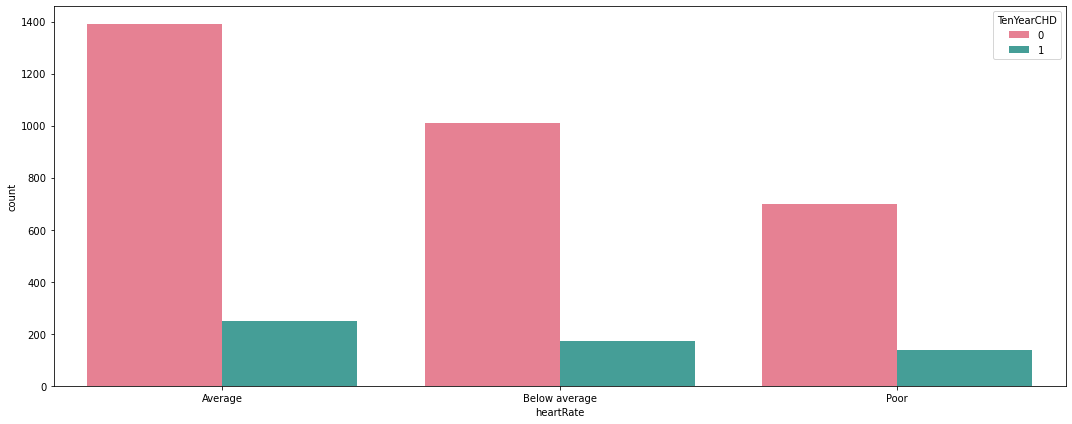

In [ ]:
##HEART RATE
plt.rcParams["figure.figsize"] = [15, 6]
df_HRate=data[['heartRate','TenYearCHD']].copy()
replacement_dictHR= {range(0, 75): 'Average', range(75, 85): 'Below average', range(85, 140): 'Poor'}
df_HRate['heartRate']=df_HRate['heartRate'].replace(replacement_dictHR)
sns.countplot(data=df_HRate, x='heartRate', hue='TenYearCHD',palette='husl',order=['Average', 'Below average', 'Poor'])
plt.savefig(datapath+'HeartRate_CHD.png')

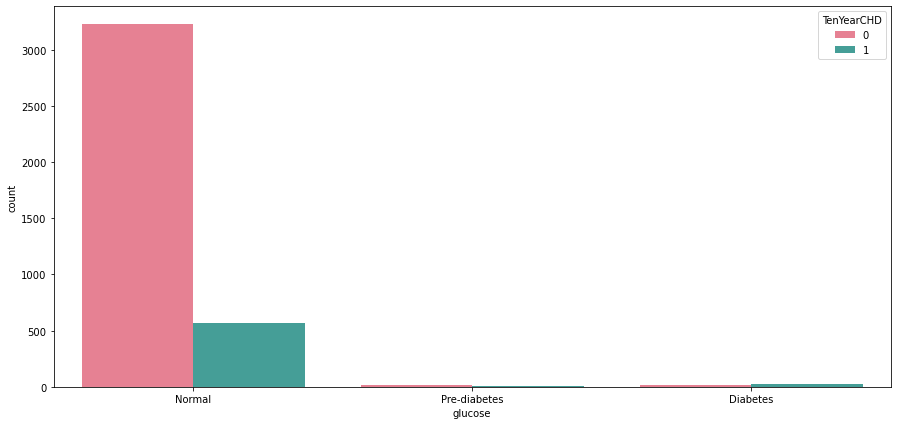

In [ ]:
##HEART RATE
plt.rcParams["figure.figsize"] = [15, 7]
df_Glu=data[['glucose','TenYearCHD']].copy()
replacement_dictGlu= {range(0, 140): 'Normal', range(140, 200): 'Pre-diabetes', range(200, 400): 'Diabetes'}
df_Glu['glucose']=df_Glu['glucose'].replace(replacement_dictGlu)
sns.countplot(data=df_Glu, x='glucose', hue='TenYearCHD',palette='husl', order=['Normal','Pre-diabetes','Diabetes'])
plt.savefig(datapath+'Glucose_CHD.png')

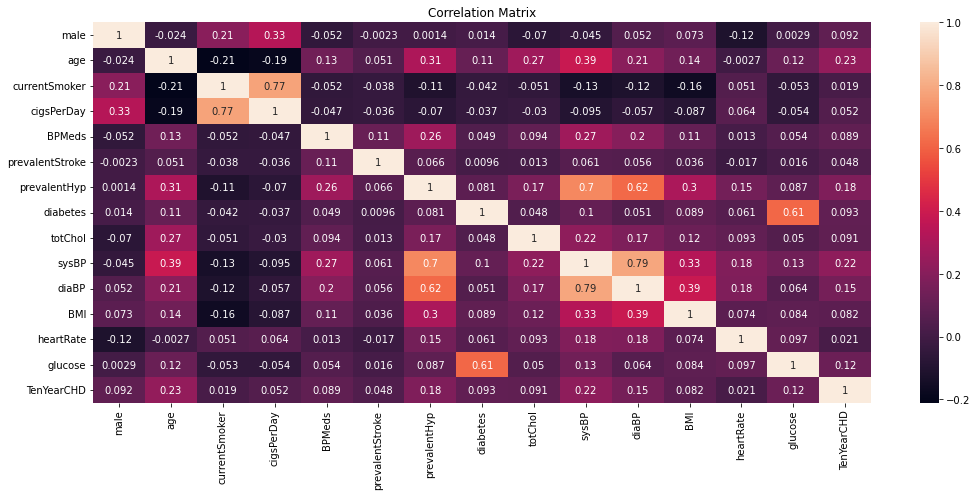

In [ ]:
#CORRELATION MATRIX
plt.rcParams["figure.figsize"] = [15, 7]
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.savefig(datapath+'CorrelationMatrix.png', dpi=100)
plt.show()

# PCA ANALYSIS
We do the PCA analysis to check if all the variables should be used or not in the model.
First of all we have to standarize all the data.
________________________________________________________________________________________________________________________________

In [ ]:
from sklearn.preprocessing import scale
X=data.drop(columns=['TenYearCHD'])
scaler=scale(X)
print(scaler)

[[ 1.11975484 -1.23257968 -0.97836413 ...  0.29205038  0.35637003
  -0.20304365]
 [-0.89305263 -0.41490473 -0.97836413 ...  0.72500993  1.60846859
  -0.24488308]
 [ 1.11975484 -0.18128332  1.02211434 ... -0.1089292  -0.06099616
  -0.49591969]
 ...
 [-0.89305263  0.28595951 -0.97836413 ... -1.06094821  0.35637003
   1.05213942]
 [ 1.11975484 -1.11576897 -0.97836413 ... -0.04496926 -0.72878206
  -0.41224082]
 [-0.89305263 -1.23257968  1.02211434 ... -1.19870806  0.77373621
  -0.07752534]]


In [ ]:
scaler.mean(axis=0)

array([ 3.10789606e-17, -2.25322464e-16, -4.27335708e-17,  3.30213956e-17,
        6.99276613e-17, -5.82730510e-18, -2.71940905e-17,  1.74819153e-17,
       -2.68056035e-16, -6.26435299e-16,  2.05898114e-16,  2.40861944e-16,
       -1.20430972e-16, -1.35970452e-16])

In [ ]:
scaler.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

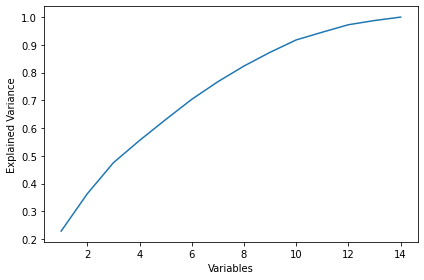

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=14).fit(scaler)
plt.figure(figsize=(6,4))
xx=np.arange(1,15,step=1)
yy=np.cumsum(pca.explained_variance_ratio_)
plt.plot(xx,yy)
plt.xlabel('Variables')
plt.ylabel('Explained Variance')
plt.savefig(datapath+'PCA_variance.png')